In [1]:
######################################
###          DATA STORY            ###
######################################

In [57]:
### Imports ###
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import scipy.stats as sstats

from pyechonest import config
from pyechonest import song
from pyechonest import artist

# Function used in this notebook
import dataStoryFunctions as dsf

In [2]:
### Main Code ###

In [3]:
# Set ECHO_NEST_API_KEY value
config.ECHO_NEST_API_KEY = "V2KYAQQLNXM5FEUUU"

In [4]:
# Define the starting and ending years 
start_year = 1960
end_year = 2014

In [5]:
# Create a list containing all the years we are interested in
years = dsf.create_years_list(start_year, end_year)

In [6]:
# Creation of the global dataframe
billboard_df = dsf.create_billboard_df_from_CSV(start_year, years)

In [7]:
#billboard_df.head()
#billboard_df.tail()

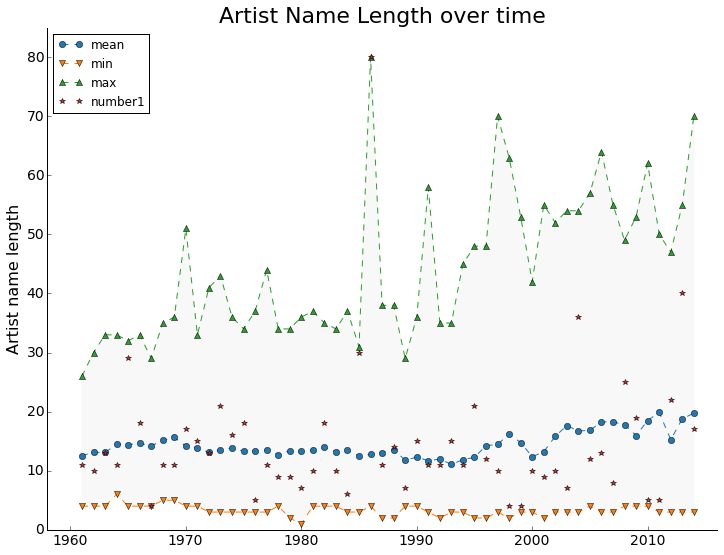

In [43]:
# Plot the Artist Name Length vs the year
dsf.create_name_length_plot('Artist(s)', billboard_df, years, start_year, end_year,
                     "Artist name length", "Artist Name Length over time",
                 "Images/Artist-name-length-over-time.png", 2) 

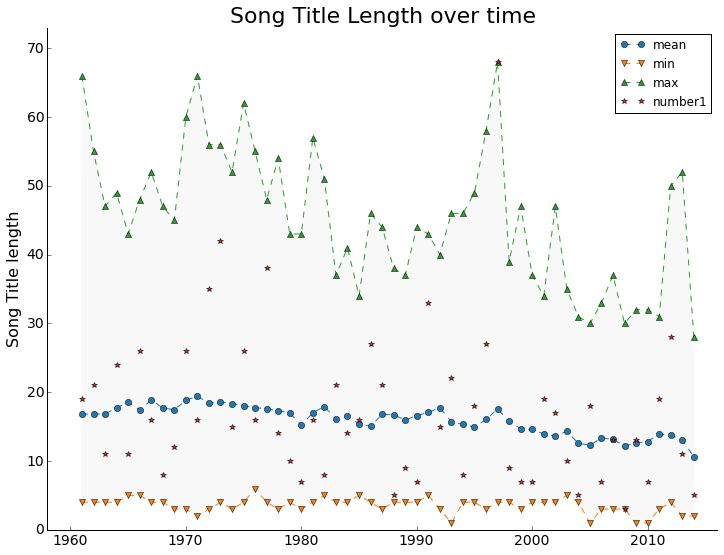

In [9]:
# Plot the Song Title Length vs the year
dsf.create_name_length_plot('Title', billboard_df, years, start_year, end_year,
                     "Song Title length", "Song Title Length over time",
                 "Images/Song-title-length-over-time.png", 1) 

In [10]:
# Number of featurings over time

In [11]:
# Total number of songs
total_songs = billboard_df['Title'].count()
print "Total songs:", total_songs
# 5501 songs because two numbers 100 in 1969

# Total number of featurings
billboard_df_featurings = billboard_df[billboard_df['Artist(s)'].str.contains("featuring")]
total_featurings = billboard_df_featurings['Title'].count()
print "Total featurings:", total_featurings

# Proportion of featurings
featuring_proportion = total_featurings / float(total_songs) * 100
print "Featuring proportion:", featuring_proportion, "%"

# Years where a featuring has been ranked #1
years_featuring_number1 = billboard_df_featurings[billboard_df_featurings['Num'] == 1]['Year']
print "Years where a featuring has been #1: ", years_featuring_number1.tolist()

Total songs: 5501
Total featurings: 520
Featuring proportion: 9.45282675877 %
Years where a featuring has been #1:  [1985, 1995, 2004, 2008, 2012, 2013]


In [44]:
# Creation of a new dataframe for the featuring number
billboard_df_featurings.loc[:,'Counts']  = billboard_df_featurings.groupby('Year')['Year'].transform('count')
billboard_df_featurings_count = pd.concat([billboard_df_featurings['Year'], 
                                           billboard_df_featurings['Counts']], axis=1,
                                          keys=['Year', 'Counts'])

billboard_df_featurings_count = billboard_df_featurings_count.groupby('Year').count().reset_index()


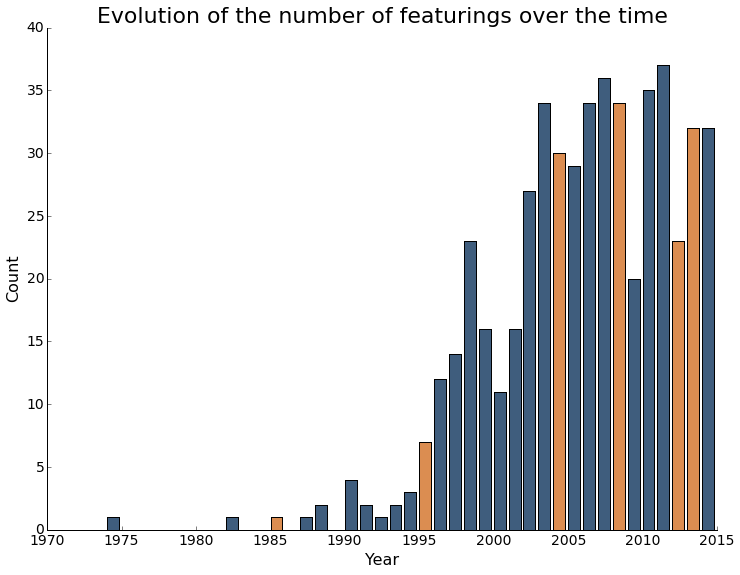

In [13]:
dsf.create_bar_chart_featurings(billboard_df_featurings_count['Year'], 
                            billboard_df_featurings_count['Counts'], 
                           "Year",
                           "Count",
                           "Evolution of the number of featurings over the time",
                           "Images/Featuring-number-over-time.png",
                               years_featuring_number1.tolist())

In [14]:
# Number of songs by artist in the Top 100

In [33]:
billboard_df_artist_count = dsf.create_entries_count_by_artist(billboard_df, start_year, end_year)
billboard_df_artist_count.head(10)

,Lead Artist(s),Counts
1244,Madonna,36
1252,Mariah Carey,29
1619,Rihanna,27
1885,The Beatles,26
636,Elton John,26
909,Janet Jackson,23
1316,Michael Jackson,22
1808,Stevie Wonder,22
2241,Whitney Houston,21
2197,Usher,20


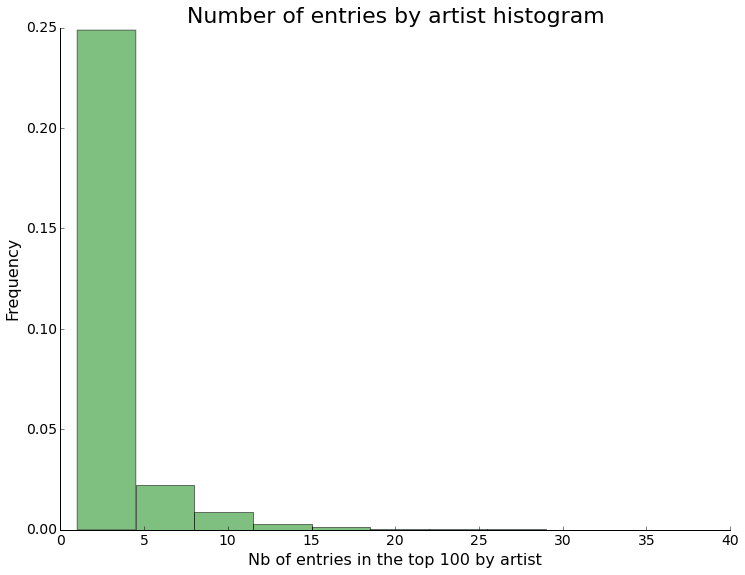

In [16]:
dsf.create_histogram_nb_entries(billboard_df_artist_count["Counts"], 
                            "Nb of entries in the top 100 by artist", 
                            "Frequency", 
                            "Number of entries by artist histogram", 
                            "Images/histogram_entries_by_artist.png")

In [17]:
cumulative_count_df = dsf.create_cumulative_counts_df(billboard_df_artist_count)

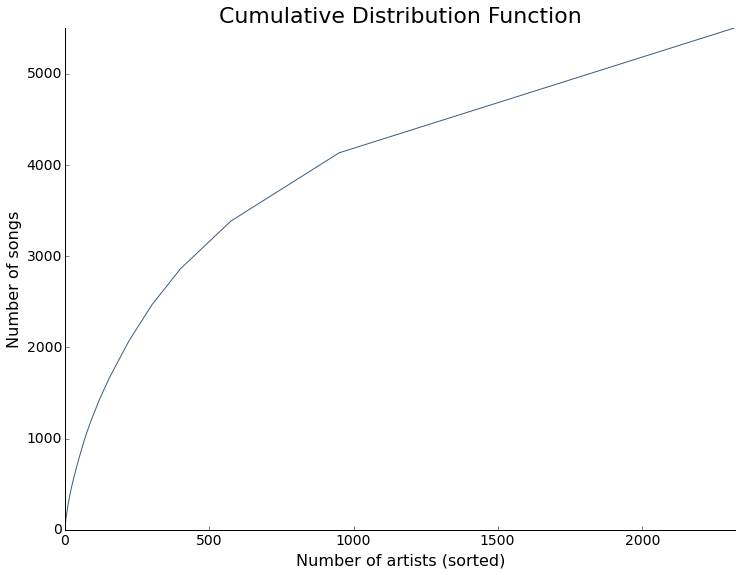

In [98]:
dsf.plot_cumulative_distribution_function(cumulative_count_df, 'Number of artists (sorted)',
                                         'Number of songs',
                                         'Cumulative Distribution Function',
                                         "Images/cdf_songs_x_artists.png")

In [99]:
reload(dsf)

<module 'dataStoryFunctions' from 'dataStoryFunctions.py'>

In [91]:
cumulative_count_reverse_df = dsf.create_cumulative_counts_reverse_df(billboard_df_artist_count)

In [92]:
total_nb_songs = cumulative_count_reverse_df.tail(1)["Cumulative Count Reverse"].tolist()[0]
print "Total number of songs:", total_nb_songs

Total number of songs: 500


In [93]:
total_nb_artists = cumulative_count_reverse_df.tail(1)["Cumulative Count Reverse"].index.tolist()[0]
print "Total number of artists:", total_nb_artists

Total number of artists: 225


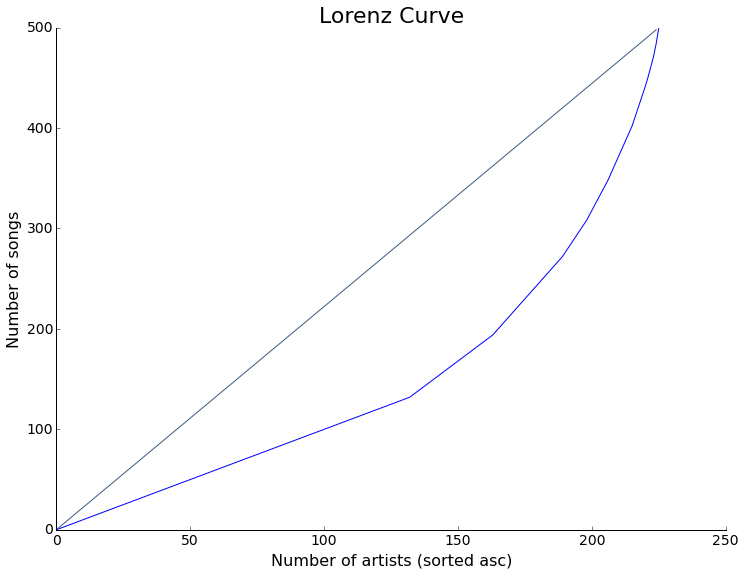

In [96]:
dsf.plot_lorenz_curve(cumulative_count_reverse_df, total_nb_songs, total_nb_artists,
                      "Number of artists (sorted asc)", 
                      "Number of songs", "Lorenz Curve",
                     "Images/lorenz_curve_full_dataset.png")

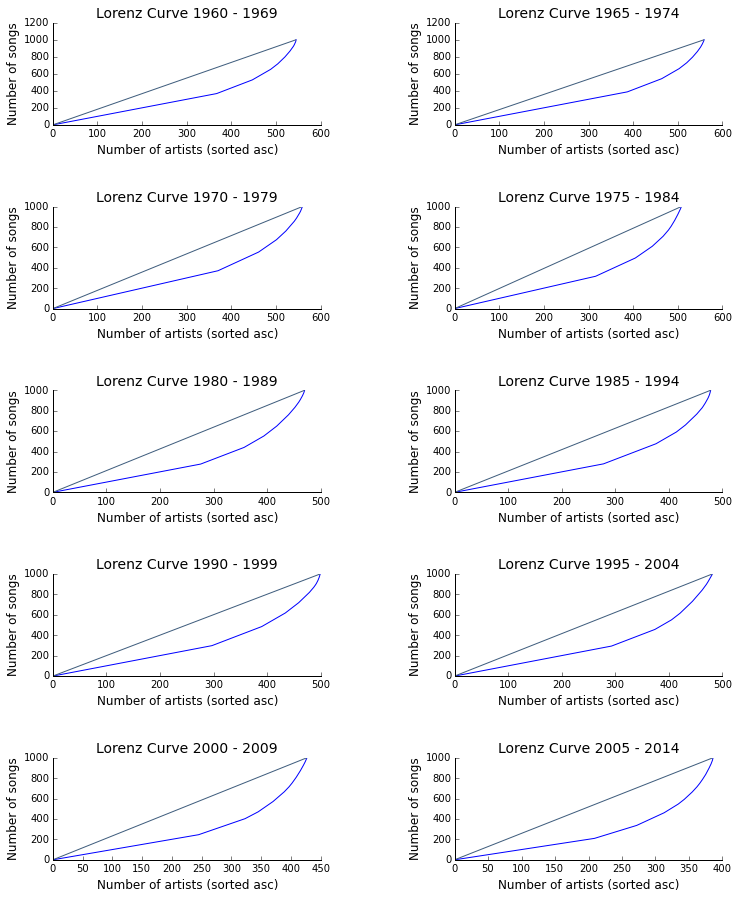

In [100]:
dsf.plot_multiple_lorenz_curves(billboard_df, start_year, end_year, 10, 5,
                                "Number of artists (sorted asc)",
                                "Number of songs", "Lorenz Curve",
                               "Images/lorenz_curves_multiple.png")